#**Name: Kinjal Bhagat**
##**Topic : Prediction using Decision Tree algorithm** 

In [1]:
import pandas as pd
import numpy as np


###**Reading CSV File**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
import io
my_data = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

In [5]:
my_data[0:5]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
my_data.shape

(150, 6)

###**Preprocessing**

In [7]:
X=my_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
Y=my_data['Species']
Y.unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
Y[0:5]


0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [10]:
display(X.shape,Y.shape)

(150, 4)

(150,)

###**Using Train Test Split Function**

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(X, Y, test_size=0.25, random_state=50)

In [13]:
import sklearn

In [14]:
sklearn.set_config(print_changed_only=False)

In [15]:
IrisTree = DecisionTreeClassifier(criterion="entropy",min_samples_split=50,max_depth=3)
IrisTree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
IrisTree.fit(X_trainset,Y_trainset)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
predTree = IrisTree.predict(X_testset)

In [18]:
from sklearn import metrics

In [19]:
print("Accuracy:",metrics.accuracy_score(Y_testset,predTree))

Accuracy: 0.9473684210526315


In [20]:
!pip install graphviz


In [21]:
!pip install pydotplus

### **Visualize Decision Tree**

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


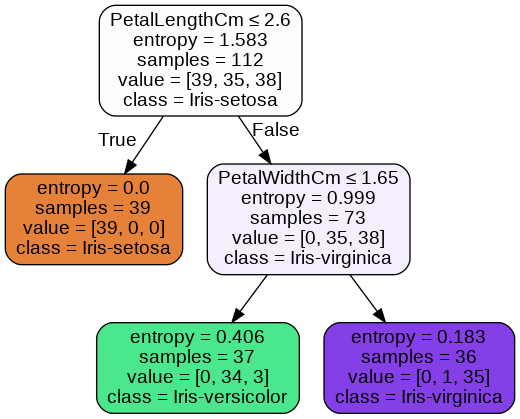

In [22]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

featurenames=my_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
dot_data = StringIO()
export_graphviz(IrisTree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = featurenames.columns[0:4],class_names= np.unique(Y_trainset))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iris.png')
Image(graph.create_png())